In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [5]:
df=pd.read_csv('pricing_data.csv')
df.head(2)

,base_price,demand,competitor_price,time_of_day,sales,optimal_price
0,100,1.2,95,1,50,110
1,200,0.8,190,3,10,190


In [7]:
df.columns

Index(['base_price', 'demand', 'competitor_price', 'time_of_day', 'sales',
       'optimal_price'],
      dtype='object')

In [9]:
df=df.drop_duplicates()

In [13]:
df = df.fillna({
    'base_price': df['base_price'].median(),  
    'demand': df['demand'].mean(),  
    'competitor_price': df['competitor_price'].mean(),  
    'time_of_day': df['time_of_day'].mode()[0], 
    'sales': df['sales'].median(),  
    'optimal_price': df['optimal_price'].mean()  
})

In [15]:
df.isnull().sum()

base_price          0
demand              0
competitor_price    0
time_of_day         0
sales               0
optimal_price       0
dtype: int64

In [17]:
df['time_of_day'] = df['time_of_day'].astype(str) 
df[['base_price', 'demand', 'competitor_price', 'sales', 'optimal_price']] = \
    df[['base_price', 'demand', 'competitor_price', 'sales', 'optimal_price']].astype(float)

In [19]:
x=df[['base_price', 'demand', 'competitor_price', 'time_of_day', 'sales']]
y=df[ 'optimal_price']

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
model= LinearRegression()

In [31]:
model.fit(X_train,Y_train)

LinearRegression()

In [33]:
predictions = model.predict(X_test)

In [35]:
mae = mean_absolute_error(Y_test, predictions)

In [37]:
print ( ' Mean Absolute Error : ', mae)

 Mean Absolute Error :  12.5000000000001


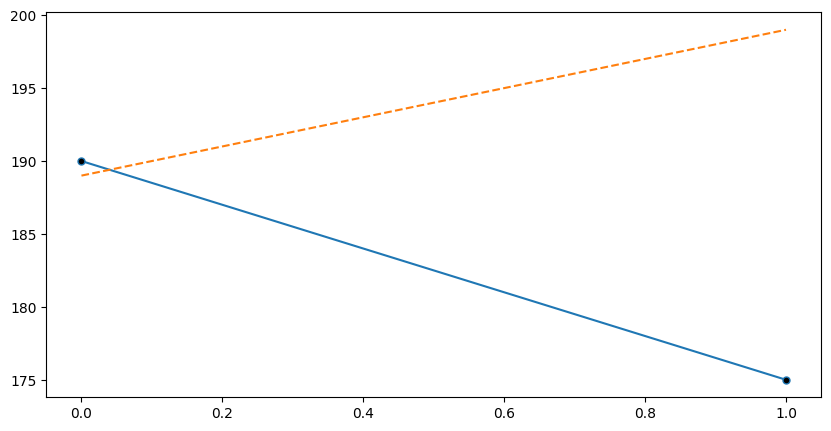

In [39]:
plt.figure (figsize=(10,5))
plt.plot(Y_test.values,marker='o', markersize=5,markerfacecolor='black')
plt.plot(predictions,ls='dashed')
plt.show()

In [41]:
def predict_price(base_price, demand, competitor_price, time_of_day, sales):
    input_data = np.array([[base_price, demand, competitor_price, time_of_day, sales]])
    predicted_price = model.predict(input_data)[0]
    return round(predicted_price, 2)

In [43]:
# Example prediction
new_price = predict_price(base_price=120, demand=1.2, competitor_price=110, time_of_day=2, sales=35)
print(f'Predicted Optimal Price: {new_price}')

Predicted Optimal Price: 115.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
